# Checking your network

Selecting which rates to include and which to exclude from your network is a bit of an art.  pynucastro has a few tools to help check what you might be missing.

Let's start by trying to create a network for carbon burning.

In [1]:
import pynucastro as pyna

In [2]:
library_file = "20180319default2"
reaclib_library = pyna.rates.Library(library_file)

To start, let's pick the nuclei $\alpha$, ${}^{12}\mathrm{C}$ and ${}^{20}\mathrm{Ne}$

In [3]:
nuclei = ["he4", "c12", "ne20"]
cburn_library = reaclib_library.linking_nuclei(nuclei)
print(cburn_library)

he4 + he4 + he4 --> c12    (he4 + he4 + he4 --> c12 <fy05_reaclib__>
c12 + c12 --> he4 + ne20    (c12 + c12 --> he4 + ne20 <cf88_reaclib__>
c12 --> he4 + he4 + he4    (c12 --> he4 + he4 + he4 <fy05_reaclib__reverse>
ne20 + he4 --> c12 + c12    (ne20 + he4 --> c12 + c12 <cf88_reaclib__reverse>


Now, since we are primarily interested in ${}^{12}\mathrm{C} + {}^{12}\mathrm{C}$, let's make sure we are not missing any other reactions that have the same reactants.  The `validate()` method will do this, by comparing the rates we have selected to another library.

In [4]:
cburn_library.validate(reaclib_library)

validation: ne20 produced in c12 + c12 --> he4 + ne20 never consumed.
validation: missing he4 + he4 + he4 --> n + c11 as alternative to he4 + he4 + he4 --> c12.
validation: missing he4 + he4 + he4 --> p + b11 as alternative to he4 + he4 + he4 --> c12.
validation: missing c12 + c12 --> n + mg23 as alternative to c12 + c12 --> he4 + ne20.
validation: missing c12 + c12 --> p + na23 as alternative to c12 + c12 --> he4 + ne20.


False

This tells us that we are missing 2 branches of the ${}^{12}\mathrm{C} + {}^{12}\mathrm{C}$ reaction.  ReacLib already scales the rates based on the branching of the products, so we should try to include these other branches.

Note: by default, `validate()` only checks forward rates.

To do so, we need to include the additional nuclei.  In particular, the branch that makes ${}^{23}\mathrm{Na}$ is likely important (the rate making ${}^{23}\mathrm{Mg}$ is endothermic, so less likely).

In [5]:
nuclei += ["p", "na23"]
cburn_library = reaclib_library.linking_nuclei(nuclei)
print(cburn_library)

he4 + he4 + he4 --> c12    (he4 + he4 + he4 --> c12 <fy05_reaclib__>
c12 + c12 --> p + na23    (c12 + c12 --> p + na23 <cf88_reaclib__>
c12 + c12 --> he4 + ne20    (c12 + c12 --> he4 + ne20 <cf88_reaclib__>
c12 --> he4 + he4 + he4    (c12 --> he4 + he4 + he4 <fy05_reaclib__reverse>
ne20 + he4 --> p + na23    (ne20 + he4 --> p + na23 <il10_reaclib__reverse>
ne20 + he4 --> c12 + c12    (ne20 + he4 --> c12 + c12 <cf88_reaclib__reverse>
na23 + p --> he4 + ne20    (na23 + p --> he4 + ne20 <il10_reaclib__>
na23 + p --> c12 + c12    (na23 + p --> c12 + c12 <cf88_reaclib__reverse>


In [6]:
cburn_library.validate(reaclib_library)

validation: ne20 produced in c12 + c12 --> he4 + ne20 never consumed.
validation: ne20 produced in na23 + p --> he4 + ne20 never consumed.
validation: missing he4 + he4 + he4 --> n + c11 as alternative to he4 + he4 + he4 --> c12.
validation: missing he4 + he4 + he4 --> p + b11 as alternative to he4 + he4 + he4 --> c12.
validation: missing c12 + c12 --> n + mg23 as alternative to c12 + c12 --> p + na23.
validation: missing c12 + c12 --> n + mg23 as alternative to c12 + c12 --> he4 + ne20.
validation: missing na23 + p --> mg24 as alternative to na23 + p --> he4 + ne20.
validation: missing na23 + p --> n + mg23 as alternative to na23 + p --> he4 + ne20.


False

Now, looking at what is missing, we probably want to include ${}^{24}\mathrm{Mg}$ as an endpoint for carbon burning.

In [7]:
nuclei += ["mg24"]
cburn_library = reaclib_library.linking_nuclei(nuclei)
print(cburn_library)

he4 + he4 + he4 --> c12    (he4 + he4 + he4 --> c12 <fy05_reaclib__>
c12 + c12 --> p + na23    (c12 + c12 --> p + na23 <cf88_reaclib__>
c12 + c12 --> he4 + ne20    (c12 + c12 --> he4 + ne20 <cf88_reaclib__>
c12 --> he4 + he4 + he4    (c12 --> he4 + he4 + he4 <fy05_reaclib__reverse>
ne20 + he4 --> mg24    (ne20 + he4 --> mg24 <il10_reaclib__>
ne20 + he4 --> p + na23    (ne20 + he4 --> p + na23 <il10_reaclib__reverse>
ne20 + he4 --> c12 + c12    (ne20 + he4 --> c12 + c12 <cf88_reaclib__reverse>
na23 + p --> mg24    (na23 + p --> mg24 <il10_reaclib__>
na23 + p --> he4 + ne20    (na23 + p --> he4 + ne20 <il10_reaclib__>
na23 + p --> c12 + c12    (na23 + p --> c12 + c12 <cf88_reaclib__reverse>
mg24 --> he4 + ne20    (mg24 --> he4 + ne20 <il10_reaclib__reverse>
mg24 --> p + na23    (mg24 --> p + na23 <il10_reaclib__reverse>


In [8]:
cburn_library.validate(reaclib_library)

validation: mg24 produced in ne20 + he4 --> mg24 never consumed.
validation: mg24 produced in na23 + p --> mg24 never consumed.
validation: missing he4 + he4 + he4 --> n + c11 as alternative to he4 + he4 + he4 --> c12.
validation: missing he4 + he4 + he4 --> p + b11 as alternative to he4 + he4 + he4 --> c12.
validation: missing c12 + c12 --> n + mg23 as alternative to c12 + c12 --> p + na23.
validation: missing c12 + c12 --> n + mg23 as alternative to c12 + c12 --> he4 + ne20.
validation: missing ne20 + he4 --> n + mg23 as alternative to ne20 + he4 --> mg24.
validation: missing na23 + p --> n + mg23 as alternative to na23 + p --> mg24.
validation: missing na23 + p --> n + mg23 as alternative to na23 + p --> he4 + ne20.


False

Now that we are happy with this, we can make a `RateCollection` and plot it

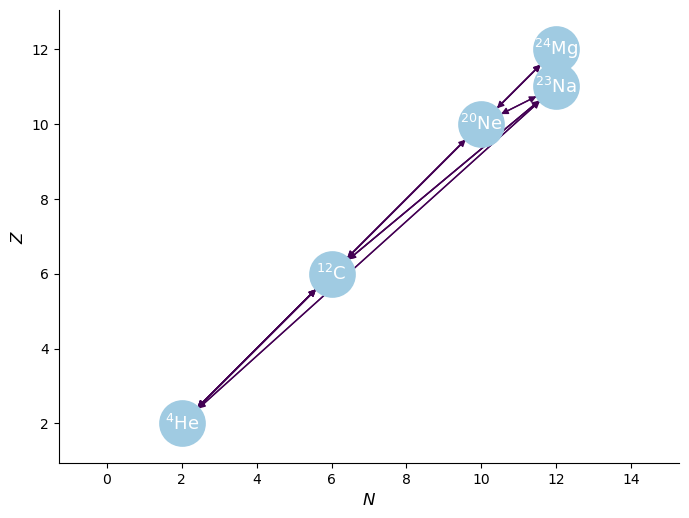

In [13]:
rc = pyna.RateCollection(libraries=[cburn_library])
rc.plot()